# Jupyter NoteBook overview

This Jupyter-notebook is a beginner-level introduction to Jupyter-notebook (formerly known as IPython) for interactive Python programming, high-performance numerical computing, and data visualization. It assumes nothing more than familiarity with Python. It targets developers, students, teachers, hobbyists who know Python a bit, and who want to learn IPython for the extended console, the Notebook, and for more advanced scientific applications.


# Code Example

Most files are Jupyter Notebooks (.ipynb extension with JSON data). There are also some Python external scripts (.py extension).

The following modules are used in at least one example:

* Python 3.7,0
* Jupyter-notebook 5.6
* NumPy
* Pandas
* SciPy
* Matplotlib
* Matplotlib basemap
* html5lib
* PyQt or PySide
* Cython
* Crycompare


## Section 1

### Data Analytics: cryptocurrency price oscillation

### Data Workflow and analysis

    -This Jupyter Notebook renders cryptocurrency price oscillation  prediction
    
    * Data Set Source: https://github.com/amisolution/ERC20-AMIS/blob/master/dataset/export-token-0x949bEd886c739f1A3273629b3320db0C5024c719.csv
            
    * Data Set Information: https://github.com/amisolution/ERC20AMIS
                

- Example 1 : View this Jupyter Notebook for Cryptocurrency Data Modelling & Analysis inside https://nbviewer.jupyter.org/github/amis-erc20/cryptocompare-notebook

- Follow the Link to access [Example 1 Jupyter Notebook for Cryptocurrency Data Modelling & Analysis](https://nbviewer.jupyter.org/github/amis-erc20/cryptocompare-notebook/cryptocompare.ipynb)
https://github.com/amis-erc20/cryptocompare-notebook

- Example 2 : View Jupyter Notebook for Cryptocurrency Data Modelling & Analysis in action inside https://nbviewer.jupyter.org/github/amis-erc20/cryptocompare-notebook

- Follow the Link to access [Example 2  Jupyter Notebook for Cryptocurrency Data Modelling & Analysis](https://nbviewer.jupyter.org/github/amis-erc20/cryptocompare-notebook/cryptocompare.ipynb)

Notes:
    
Attribute Information:

                * date: Date in format dd/mm/yyyy
                * time: time in format hh:mm:ss
                * Volume in: Volume in
                * Volume out: Volume out
                * Price
    
# Content

## Section 1

### Data Analytics: Altcoin and cryptocurrency prediction

### Data Workflow and analysis

    -This Jupyter Notebook analyses cryptocurrency trends and prediction


Time series have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

For more information about the Jupyter Notebook scripts and figures, please refer to the paper and to the following github repository:

[Web Link](https://github.com/amisolution/ERC20AMIS/)
               

## Section 2
    
    * Data Set Source: Quandl
            
    * Data Set Information: https://github.com/amisolution/ERC20AMIS/dataset/

## Section 3
    
    * Data Set Source: CoinMarketCap
            
    * Data Set Information: https://github.com/amisolution/ERC20AMIS/dataset/

## Section 4
    
    * Data Set Source: CryptoCompare
            
    * Data Set Information: https://github.com/amisolution/ERC20AMIS/dataset/

## Section 5
    
    * Data Set Source: Etherscan
            
    * Data Set Information: https://github.com/amisolution/ERC20AMIS/dataset/

## Section 1

### Data Analytics: Altcoin and cryptocurrency prediction

### Project setup
Let's first import the required dependencies.

In [27]:
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install joblib
!pip install crycompare
!pip install ClusterLib
!pip install lxml
!pip install html5lib

    100% |████████████████████████████████| 122kB 4.2MB/s ta 0:00:01


Retrieve the data from the data source

In [1]:
import coinmarketcap

import bs4 as bs
import datetime as dt
import os
import pandas as pd
#import pandas_datareader as web
import pickle
import requests

def save_cmc_tickers():
    resp = requests.get('https://coinmarketcap.com')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class': 'table floating-header'})
    #table1 = soup.find('table', {'class': 'no-wrap text-right'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('a')[0].text
        price = row.findAll('a', {'class': 'price'})[0].text
        tickers.append(ticker)
        tickers.append(price)

    with open("cmctickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    print(tickers)

    return tickers

    #save_cmc_tickers()

    def get_data_from_cmc(reload_cmc100=False):

        if reload_cmc100:
            tickers = save_cmc_tickers()
        else:
            with open("cmctickers.pickle", "rb") as f:
                tickers = pickle.load(f)

    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime(2017, 12, 31)

    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pd.read_html(ticker, 'coinmarketcap', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print("Already have {}".format(ticker))

#get_data_from_cmc()
#print()
coinmarketcap.core.Market()

In [2]:
!conda list

# packages in environment at /srv/conda:
#
# Name                    Version                   Build  Channel
alembic                   1.0.8                     <pip>
asn1crypto                0.24.0                   py37_0    defaults
async-generator           1.10                      <pip>
attrs                     19.1.0                     py_0    conda-forge
backcall                  0.1.0                      py_0    conda-forge
beautifulsoup4            4.7.1                     <pip>
bleach                    3.1.0                      py_0    conda-forge
bs4                       0.0.1                     <pip>
bzip2                     1.0.6             h14c3975_1002    conda-forge
ca-certificates           2019.3.9             hecc5488_0    conda-forge
certifi                   2019.3.9                 py37_0    conda-forge
cffi                      1.11.5           py37he75722e_1    defaults
chardet                   3.0.4                    py37_1    defaults
clusterlib

In [3]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [4]:
def CryptoData(symbol, frequency):
    #Params: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    df = pd.read_json(url)
    df.set_index('date',inplace=True)
    return df

In [5]:
df = CryptoData('USDT_BTC', 86400)['close']

In [14]:
df.head()

date
2015-02-19    244.00
2015-02-20    240.25
2015-02-21    245.00
2015-02-22    235.00
2015-02-23    235.00
Name: close, dtype: float64

In [7]:
df.tail()

date
2019-03-23    4003.800000
2019-03-24    3991.510000
2019-03-25    3943.999998
2019-03-26    3946.356301
2019-03-27    4020.306638
Name: close, dtype: float64

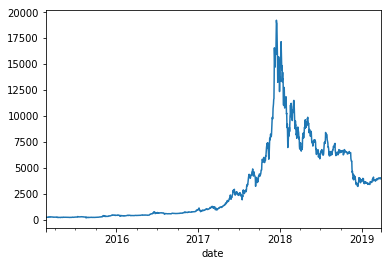

In [8]:
df.plot()

In [9]:
df.pct_change().describe()

count    1497.000000
mean        0.002700
std         0.040536
min        -0.318834
25%        -0.011903
50%         0.002448
75%         0.018739
max         0.270148
Name: close, dtype: float64

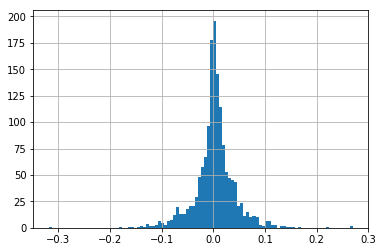

In [10]:
df.pct_change().hist(bins=100)

In [11]:
import coinmarketcap

import bs4 as bs
import datetime as dt
import os
import pandas as pd
#import pandas_datareader as web
import pickle
import requests

def save_cmc_tickers():
    resp = requests.get('https://coinmarketcap.com')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class': 'table floating-header'})
    #table1 = soup.find('table', {'class': 'no-wrap text-right'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('a')[0].text
        price = row.findAll('a', {'class': 'price'})[0].text
        tickers.append(ticker)
        tickers.append(price)

    with open("cmctickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    print(tickers)

    return tickers

    #save_cmc_tickers()

    def get_data_from_cmc(reload_cmc100=False):

        if reload_cmc100:
            tickers = save_cmc_tickers()
        else:
            with open("cmctickers.pickle", "rb") as f:
                tickers = pickle.load(f)

    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime(2017, 12, 31)

    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pd.read_html(ticker, 'coinmarketcap', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print("Already have {}".format(ticker))

#get_data_from_cmc()
#print()
coinmarketcap.core.Market()

In [12]:
def CryptoData(symbol, frequency):
    #Params: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url ='https://min-api.cryptocompare.com/data/top/exchanges/full?fsym=AMIS&tsym=ETH'
    df = pd.read_json(url)
    df.set_index('date',inplace=True)
    return df

In [16]:
df.head()

date
2015-02-19    244.00
2015-02-20    240.25
2015-02-21    245.00
2015-02-22    235.00
2015-02-23    235.00
Name: close, dtype: float64

In [15]:
df.tail()

date
2019-03-23    4003.800000
2019-03-24    3991.510000
2019-03-25    3943.999998
2019-03-26    3946.356301
2019-03-27    4020.306638
Name: close, dtype: float64

In [41]:
def CryptoData(symbol, frequency):
    #Params: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url ='https://min-api.cryptocompare.com/data/top/exchanges/full?fsym=AMIS&tsym=ETH'
    df = pd.read_json(url)
#    df.set_index('date',inplace=True)
    return df

In [44]:
#df = CryptoData('AMIS_ETH', 86400)['close']
df = CryptoData('AMIS','ETH')
df.head()

,Response,Message,Data,RateLimit,HasWarning,Type
AggregatedData,Success,Total available exchanges - 1,"{'TYPE': '5', 'MARKET': 'CCCAGG', 'FROMSYMBOL'...",NaN,False,100
CoinInfo,Success,Total available exchanges - 1,"{'Id': '57676', 'Name': 'AMIS', 'FullName': 'A...",NaN,False,100
Exchanges,Success,Total available exchanges - 1,"[{'TYPE': '2', 'MARKET': 'EtherDelta', 'FROMSY...",NaN,False,100


In [54]:
import html5lib
import pandas as pd
import lxml
#url = 'https://min-api.cryptocompare.com/data/generateAvg?fsym=AMIS&tsym=ETH&e=etherdelta'
url = 'https://github.com/amisolution/ERC20-AMIS/blob/master/dataset/export-token-0x949bEd886c739f1A3273629b3320db0C5024c719.csv'
df=pd.read_csv(url)
df[0]

ParserError: Error tokenizing data. C error: Expected 1 fields in line 32, saw 5


In [46]:
import pandas as pd
import lxml
url = 'https://coinmarketcap.com/all/views/all/'
df=pd.read_html(url, header=None)
df[0]

,#,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24h),% 1h,% 24h,% 7d,Unnamed: 10
0,1,BTC Bitcoin,BTC,"$71,740,236,255",$4073.18,17612850,"$11,149,166,224",0.08%,3.06%,0.53%,Add to Watchlist Remove from Watchlist Watchli...
1,2,ETH Ethereum,ETH,"$14,737,996,433",$139.82,105410141,"$5,033,794,431",0.13%,4.13%,0.40%,Add to Watchlist Remove from Watchlist Watchli...
2,3,XRP XRP,XRP,"$12,938,566,458",$0.310229,"41,706,564,590 *","$798,764,763",0.11%,3.17%,-2.18%,Add to Watchlist Remove from Watchlist Watchli...
3,4,LTC Litecoin,LTC,"$3,754,454,122",$61.48,61069086,"$2,176,161,314",-0.02%,4.72%,2.17%,Add to Watchlist Remove from Watchlist Watchli...
4,5,EOS EOS,EOS,"$3,722,882,161",$4.11,"906,245,118 *","$2,744,370,656",0.65%,12.54%,10.18%,Add to Watchlist Remove from Watchlist Watchli...
5,6,BCH Bitcoin Cash,BCH,"$3,009,444,182",$170.07,17695525,"$527,445,408",0.38%,8.13%,6.92%,Add to Watchlist Remove from Watchlist Watchli...
6,7,BNB Binance Coin,BNB,"$2,376,880,202",$16.84,"141,175,490 *","$187,188,129",0.24%,5.39%,10.31%,Add to Watchlist Remove from Watchlist Watchli...
7,8,USDT Tether,USDT,"$2,047,242,787",$1.01,"2,020,708,392 *","$10,198,001,080",-0.05%,0.63%,0.44%,Add to Watchlist Remove from Watchlist Watchli...
8,9,XLM Stellar,XLM,"$2,040,524,880",$0.106067,"19,238,129,242 *","$275,439,650",-0.05%,6.66%,-5.46%,Add to Watchlist Remove from Watchlist Watchli...
9,10,ADA Cardano,ADA,"$1,737,682,033",$0.067022,25927070538,"$103,642,886",0.75%,10.99%,26.37%,Add to Watchlist Remove from Watchlist Watchli...


### Now let's retrieve some data from the AMIS dataset

In [55]:
# %%timeit
#url= 'https://raw.githubusercontent.com/amisolution/ERC20AMIS/dataset/'
URL = 'https://github.com/amisolution/ERC20-AMIS/blob/master/dataset/export-token-0x949bEd886c739f1A3273629b3320db0C5024c719.csv'

In [56]:
import pandas as pd
import html5lib

In [57]:
df.head()

,"{""RAW"":{""MARKET"":""CUSTOMAGG""","FROMSYMBOL:""AMIS""","TOSYMBOL:""ETH""",FLAGS:0,PRICE:0.000027,LASTUPDATE:1549869870,LASTVOLUME:100,LASTVOLUMETO:0.0026999999999999997,"LASTTRADEID:""1549869870000""",VOLUME24HOUR:0,...,"VOLUME24HOUR:""AMIS 0""","VOLUME24HOURTO:""Ξ 0""","OPEN24HOUR:""Ξ 0.00002700""","HIGH24HOUR:""Ξ 0.00002700""","LOW24HOUR:""Ξ 0.00002700""","LASTMARKET:""EtherDelta"".1","CHANGE24HOUR:""Ξ 0.0""","CHANGEPCT24HOUR:""0.00""","CHANGEDAY:""Ξ 0""","CHANGEPCTDAY:""0""}}"


In [58]:
df.tail()

,"{""RAW"":{""MARKET"":""CUSTOMAGG""","FROMSYMBOL:""AMIS""","TOSYMBOL:""ETH""",FLAGS:0,PRICE:0.000027,LASTUPDATE:1549869870,LASTVOLUME:100,LASTVOLUMETO:0.0026999999999999997,"LASTTRADEID:""1549869870000""",VOLUME24HOUR:0,...,"VOLUME24HOUR:""AMIS 0""","VOLUME24HOURTO:""Ξ 0""","OPEN24HOUR:""Ξ 0.00002700""","HIGH24HOUR:""Ξ 0.00002700""","LOW24HOUR:""Ξ 0.00002700""","LASTMARKET:""EtherDelta"".1","CHANGE24HOUR:""Ξ 0.0""","CHANGEPCT24HOUR:""0.00""","CHANGEDAY:""Ξ 0""","CHANGEPCTDAY:""0""}}"


In [59]:

df = pd.read_html(url)
df = df[0].loc[:, ~df[0].columns.str.contains('^Unnamed')]
df.head(2)

AttributeError: Can only use .str accessor with string values (i.e. inferred_type is 'string', 'unicode' or 'mixed')

In [60]:
from crycompare import price as price
print(price.coin_snapshot('amis', 'eth'))

{'Response': 'Success', 'Message': 'This has been moved to https://min-api.cryptocompare.com/data/top/exchanges/full?fsym=AMIS&tsym=ETH', 'Data': {'Algorithm': None, 'ProofType': None, 'BlockNumber': 0, 'NetHashesPerSecond': 0.0, 'TotalCoinsMined': 20000000.0, 'BlockReward': 0.0, 'AggregatedData': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FROMSYMBOL': 'AMIS', 'TOSYMBOL': 'ETH', 'FLAGS': '4', 'PRICE': '14.12', 'LASTUPDATE': '1544826316', 'LASTVOLUME': '0.001', 'LASTVOLUMETO': '0.014119999999999999', 'LASTTRADEID': '1544826316000', 'VOLUMEDAY': '0', 'VOLUMEDAYTO': '0', 'VOLUME24HOUR': '0', 'VOLUME24HOURTO': '0', 'OPENDAY': '14.12', 'HIGHDAY': '14.12', 'LOWDAY': '14.12', 'OPEN24HOUR': '14.12', 'HIGH24HOUR': '14.12', 'LOW24HOUR': '14.12', 'LASTMARKET': 'EtherDelta'}, 'Exchanges': [{'TYPE': '2', 'MARKET': 'EtherDelta', 'FROMSYMBOL': 'AMIS', 'TOSYMBOL': 'ETH', 'FLAGS': '4', 'PRICE': '0.000027', 'LASTUPDATE': '1549869870', 'LASTVOLUME': '100', 'LASTVOLUMETO': '0.0026999999999999997', 'LASTTRADEID': 

In [61]:
import crycompare

In [62]:
crycompare.price.coin_list()

{'Response': 'Success',
 'Message': 'Coin list succesfully returned! This api is moving to https://min-api.cryptocompare.com/data/all/coinlist, please change the path.',
 'BaseImageUrl': 'https://www.cryptocompare.com',
 'BaseLinkUrl': 'https://www.cryptocompare.com',
 'DefaultWatchlist': {'CoinIs': '1182,7605,5038,24854,3807,3808,202330,5324,5031,20131',
  'Sponsored': ''},
 'SponosoredNews': [],
 'Data': {'NXT': {'Id': '1183',
   'Url': '/coins/nxt/overview',
   'ImageUrl': '/media/20627/nxt.png',
   'Name': 'NXT',
   'Symbol': 'NXT',
   'CoinName': 'Nxt',
   'FullName': 'Nxt (NXT)',
   'Algorithm': 'PoS',
   'ProofType': 'PoS/LPoS',
   'FullyPremined': '1',
   'TotalCoinSupply': '1000000000',
   'BuiltOn': 'N/A',
   'SmartContractAddress': 'N/A',
   'PreMinedValue': 'N/A',
   'TotalCoinsFreeFloat': 'N/A',
   'SortOrder': '6',
   'Sponsored': False},
  'BTCD': {'Id': '4400',
   'Url': '/coins/btcd/overview',
   'ImageUrl': '/media/19630/btcd_1.png',
   'Name': 'BTCD',
   'Symbol': 'B

In [63]:
df = pd.read_html(url)
df = df[0].loc[:, ~df[0].columns.str.contains('^Unnamed')]
df.head(2)

AttributeError: Can only use .str accessor with string values (i.e. inferred_type is 'string', 'unicode' or 'mixed')

In [64]:
import clusterlib

In [65]:
# step 1 https://gmarti.gitlab.io/cryptocurrency/2017/08/25/download-cryptocoins-api-python.html
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import operator
import matplotlib.pyplot as plt

#from crycompare import *
#from ClusterLib import *
from crycompare import  price as p
#from ClusterLib.clusterlib import *
#from ClusterLib.distlib import *
#from clusterlib.clusterlib import *
from clusterlib import *
#from clusterlib.distlib import *

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
# step 2 https://gmarti.gitlab.io/cryptocurrency/2017/08/25/download-cryptocoins-api-python.html
#p = crycompare.price.price(from_curr=Eth,to_curr=AMIS)
p = crycompare.price.price('amis', 'eth')

coinList = crycompare.price.coin_list()
#crycompare.price.coin_list()
coins = sorted(list( coinList['Data'].keys() ))

In [67]:
# step 3 https://gmarti.gitlab.io/cryptocurrency/2017/08/25/download-cryptocoins-api-python.html
#h = crycompare.price.History()
h = crycompare.price.price_historical('amis', 'eth', 'CCCAGG')
#h = crycompare.price_historical('amis', 'eth', 'CCCAGG')
df_dict = {}
for coin in coins:
#    histo = h.histoDay(coin,'USD',allData=True)
#    histo = h.crycompare.price.day_avg(coin,'USD',allData=True)
    histo = crycompare.price.day_avg('amis', 'eth')
#    histo = crycompare.price_historical
    if histo['Data']:
        df_histo = pd.DataFrame(histo['Data'])
        df_histo['time'] = pd.to_datetime(df_histo['time'],unit='s')
        df_histo.index = df_histo['time']
        del df_histo['time']
        del df_histo['volumefrom']
        del df_histo['volumeto']
        
        df_dict[coin] = df_histo

KeyError: 'Data'

In [ ]:
# Step 4
crypto_histo = pd.concat(df_dict.values(), axis=1, keys=df_dict.keys())

In [68]:
# Step 5
histo_coins = [elem for elem in crypto_histo.columns.levels[0] if not elem == 'MYC']

NameError: name 'crypto_histo' is not defined

In [69]:
# Step 6
histo_length = {}
for coin in histo_coins:
    histo_length[coin] = np.sum( ~np.isnan(crypto_histo[coin]['close'].values) )
    
sorted_length = sorted(histo_length.items(), key=operator.itemgetter(1),reverse=True)

NameError: name 'histo_coins' is not defined

In [70]:
# Step 7
# we keep the 300 coins having the longest time series of historical prices
sub_coins = [sorted_length[i][0] for i in range(300)]

sub_crypto_histo = crypto_histo[sub_coins]
sub_crypto_histo.tail()

NameError: name 'sorted_length' is not defined

In [71]:
N = len(sub_coins)
recent_histo = sub_crypto_histo[-1000:]

NameError: name 'sub_coins' is not defined

In [72]:
returns_dict = {}
for coin in sub_coins:
    coin_histo = recent_histo[coin]
    coin_returns = pd.DataFrame(np.diff(np.log(coin_histo.get_values()),axis=0))
    returns_dict[coin] = coin_returns

recent_returns = pd.concat(returns_dict.values(),axis=1,keys=returns_dict.keys())
recent_returns.index = recent_histo.index[1:]

NameError: name 'sub_coins' is not defined

In [73]:
recent_returns = recent_returns.replace([np.inf, -np.inf], np.nan)
recent_returns = recent_returns.fillna(value=0)

NameError: name 'recent_returns' is not defined

In [74]:
recent_returns.isnull().values.any()

NameError: name 'recent_returns' is not defined

In [78]:
plt.figure(figsize=(40,10))
for coin in crycompare.price.sub_coins:
    plt.plot(recent_returns[coin])
#plt.legend(sub_coins,loc='upper left')
plt.xlabel('time',fontsize=18)
plt.ylabel('returns \'X/USD\'',fontsize=18)
plt.show()

AttributeError: module 'crycompare.price' has no attribute 'sub_coins'

<Figure size 2880x720 with 0 Axes>

In [76]:
#### End of https://gmarti.gitlab.io/cryptocurrency/2017/08/25/download-cryptocoins-api-python.html

In [77]:
%ls

cryptocompare.ipynb  LICENSE  README.md
